# Vishal Bhalla | 10/25/2016

## Logistic Regression Model

Below requires the output from the feature extraction notebook, 4_GeoEmpTitle_Feature_Extraction.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale

In [7]:
random_state=401
n_jobs = 4

In [8]:
cd Data

[Errno 2] No such file or directory: 'Data'
/Users/Shalu/Dropbox/Coursework/DS/KLC/Submission/Data


In [9]:
#Import output from other notebooks
#dfc = pd.read_pickle('dfc_zip_fuzzy_final.p')

In [10]:
dfc.shape

(232487, 34)

In [11]:
dfc.columns

Index([u'index', u'loan_amnt', u'term', u'int_rate', u'grade', u'sub_grade', u'emp_title', u'emp_length', u'home_ownership', u'annual_inc', u'verification_status', u'loan_status', u'purpose', u'zip_code', u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'loan_label', u'emp_title_flag', u'fico_avg', u'f_norm_emp_title', u'fw_emp_title', u'emp_length_cat', u'fw_emp_title_gt0005', u'zip_gt001'], dtype='object')

### Mapping allowing conversion of Subgrade Rating

In [12]:
grades = {
'A1': 1,
'A2': 2,
'A3': 3,
'A4': 4,
'A5': 5,
'B1': 6,
'B2': 7,
'B3': 8,
'B4': 9,
'B5': 10,
'C1': 11,
'C2': 12,
'C3': 13,
'C4': 14,
'C5': 15,
'D1': 16,
'D2': 17,
'D3': 18,
'D4': 19,
'D5': 20,
'E1': 21,
'E2': 22,
'E3': 23,
'E4': 24,
'E5': 25,
'F1': 26,
'F2': 27,
'F3': 28,
'F4': 29,
'F5': 30,
'G1': 31,
'G2': 32,
'G3': 33,
'G4': 34,
'G5': 35
}

In [13]:
dfc['grade_val'] = dfc.sub_grade.map(grades)

In [14]:
df_reduce = dfc.copy()
del dfc

In [15]:
df_reduce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232487 entries, 0 to 232486
Data columns (total 35 columns):
index                         232487 non-null int64
loan_amnt                     232487 non-null float64
term                          232487 non-null object
int_rate                      232487 non-null float64
grade                         232487 non-null object
sub_grade                     232487 non-null object
emp_title                     232487 non-null object
emp_length                    232487 non-null int64
home_ownership                232487 non-null object
annual_inc                    232487 non-null float64
verification_status           232487 non-null object
loan_status                   232487 non-null object
purpose                       232487 non-null object
zip_code                      232487 non-null object
addr_state                    232487 non-null object
dti                           232487 non-null float64
delinq_2yrs                   232487 no

## Prepare Data for Algo

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import scale
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [17]:
def my_scorer(clf, X, y):
    y_pred_prob = clf.predict_proba(X)[:,1]
    return roc_auc_score(y, y_pred_prob)

In [18]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=random_state)
scoring_function = my_scorer

## Logistic Regression Using Ratings

In [19]:
logreg = LogisticRegression(penalty='l2', random_state=random_state, n_jobs=n_jobs)

In [20]:
C_range = 1.0/np.power(10,np.arange(0,8,1))
print C_range
parameters=dict(C=C_range)
grid_log = GridSearchCV(estimator=logreg, param_grid=parameters, cv=sss, n_jobs=n_jobs, scoring=my_scorer, refit=True)

[  1.00000000e+00   1.00000000e-01   1.00000000e-02   1.00000000e-03
   1.00000000e-04   1.00000000e-05   1.00000000e-06   1.00000000e-07]


In [45]:
df_reduce.columns

Index([u'index', u'loan_amnt', u'term', u'int_rate', u'grade', u'sub_grade', u'emp_title', u'emp_length', u'home_ownership', u'annual_inc', u'verification_status', u'loan_status', u'purpose', u'zip_code', u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'loan_label', u'emp_title_flag', u'fico_avg', u'f_norm_emp_title', u'fw_emp_title', u'top200_fw_emp_title', u'emp_length_cat', u'grade_val'], dtype='object')

In [57]:
features = ['grade_val']
target = ['loan_label']

X=df_reduce[features]
col = X.columns
print col
X = pd.get_dummies(X)
X = scale(X)
y=df_reduce[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=.3, random_state=random_state)
start = time()
grid_log.fit(X_train,y_train)
end = time()
print "{:.4f} seconds".format(end - start)
print grid_log.best_score_
print grid_log.best_estimator_
print grid_log.cv_results_
y_pred_prob = grid_log.predict_proba(X_test)[:,1]

print roc_auc_score(y_test, y_pred_prob)

Index([u'grade_val'], dtype='object')
3.5504 seconds
0.670512978067
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=401, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'std_train_score': array([ 0.00011207,  0.00011207,  0.00011207,  0.00011207,  0.00011207,
        0.00011207,  0.00011207,  0.00011207]), 'rank_test_score': array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), 'mean_score_time': array([ 0.01165175,  0.00802461,  0.00882252,  0.00784572,  0.00863258,
        0.01134197,  0.02205936,  0.00840267]), 'std_test_score': array([ 0.00045424,  0.00045424,  0.00045424,  0.00045424,  0.00045424,
        0.00045424,  0.00045424,  0.00045424]), 'split1_train_score': array([ 0.67065287,  0.67065287,  0.67065287,  0.67065287,  0.67065287,
        0.67065287,  0.67065287,  0.67065287]), 'split0_test_score': array([ 0.67004881,  0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b744610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118baef90>], dtype=object)

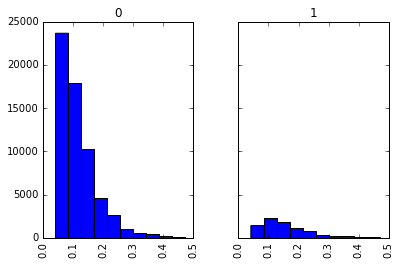

In [75]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame(data = {'probability':y_pred_prob, 'actual':y_test})
df.probability.hist(by=df.actual, sharex=True, sharey=True)

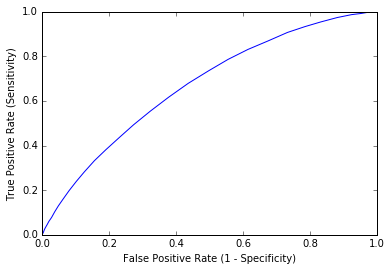

In [73]:
# plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# Logistic Regression Let's Use Everything Else But Ratings

### Run with emp_length as continuous

In [14]:
df_reduce.columns

Index([u'index', u'loan_amnt', u'term', u'int_rate', u'grade', u'sub_grade', u'emp_title', u'emp_length', u'home_ownership', u'annual_inc', u'verification_status', u'loan_status', u'purpose', u'zip_code', u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'loan_label', u'emp_title_flag', u'fico_avg', u'f_norm_emp_title', u'fw_emp_title', u'emp_length_cat', u'fw_emp_title_gt0005', u'zip_gt001'], dtype='object')

In [16]:
features = [u'loan_amnt', 'term', 'int_rate', 'emp_length', #'emp_title', 
            u'home_ownership', u'annual_inc',u'verification_status', u'purpose', 
            #u'zip_code',#u'addr_state', 
            u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', 
            u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',u'emp_title_flag',  
            u'fico_avg']

target = ['loan_label']

X=df_reduce[features]
print X.columns
X = pd.get_dummies(X)
#col = X.columns
print X.shape
X = scale(X)
y=df_reduce[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=.3, random_state=random_state)

Index([u'loan_amnt', u'term', u'int_rate', u'emp_length', u'home_ownership',
       u'annual_inc', u'verification_status', u'purpose', u'dti',
       u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status',
       u'collections_12_mths_ex_med', u'mort_acc', u'emp_title_flag',
       u'fico_avg'],
      dtype='object')


In [17]:
X_train.shape

(162740, 39)

In [21]:
start = time()
grid_log.fit(X_train,y_train)
end = time()
print "{:.4f} seconds".format(end - start)
print grid_log.best_score_
print grid_log.best_estimator_
grid_log.cv_results_

10.5715 seconds
0.688885708437
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=401, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


{'mean_fit_time': array([ 4.13636613,  4.71101737,  3.79354636,  3.02300064,  2.36839835,
         1.29767036,  0.91975005,  0.69206262]),
 'mean_score_time': array([ 0.05579066,  0.05880729,  0.06394704,  0.02731768,  0.0240976 ,
         0.02514426,  0.02177866,  0.01631999]),
 'mean_test_score': array([ 0.68888571,  0.68888418,  0.68887506,  0.68865119,  0.68608079,
         0.67941793,  0.67568833,  0.67512025]),
 'mean_train_score': array([ 0.6906716 ,  0.69066985,  0.69065155,  0.69037541,  0.68766157,
         0.68046039,  0.67634919,  0.67571606]),
 'param_C': masked_array(data = [1.0 0.10000000000000001 0.01 0.001 0.0001 1.0000000000000001e-05
  9.9999999999999995e-07 9.9999999999999995e-08],
              mask = [False False False False False False False False],
        fill_value = ?),
 'params': ({'C': 1.0},
  {'C': 0.10000000000000001},
  {'C': 0.01},
  {'C': 0.001},
  {'C': 0.0001},
  {'C': 1.0000000000000001e-05},
  {'C': 9.9999999999999995e-07},
  {'C': 9.99999999999999

In [22]:
y_pred_prob = grid_log.predict_proba(X_test)[:,1]
#print zip(list(col),logreg.coef_[0])
roc_auc_score(y_test, y_pred_prob)

0.68783843569982017

### Emp_length as Categorical

In [34]:
df_reduce.columns

Index([u'index', u'loan_amnt', u'term', u'int_rate', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'loan_status', u'purpose', u'zip_code',
       u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line',
       u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util',
       u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',
       u'loan_label', u'emp_title_flag', u'fico_avg', u'f_norm_emp_title',
       u'fw_emp_title', u'emp_length_cat'],
      dtype='object')

In [39]:
#X=df_reduce[features]
#print X.columns
X = pd.get_dummies(X)

In [ ]:
#0.688128783414

In [97]:
features = [u'loan_amnt', 'term', 'int_rate', #'emp_length', 'emp_title', 
            u'home_ownership', u'annual_inc',u'verification_status', u'purpose', 
            #u'zip_code',#u'addr_state', 
            u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', 
            u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',u'emp_title_flag',  
            u'fico_avg', #'fw_emp_title', 
            'emp_length_cat'
           ]

target = ['loan_label']

X=df_reduce[features]
print X.columns
X = pd.get_dummies(X)
col = X.columns
print X.shape
X = scale(X)
y=df_reduce[target].values.ravel()
print X_train.shape

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=.3, random_state=random_state)
start = time()
grid_log.fit(X_train,y_train)
end = time()
print "{:.4f} seconds".format(end - start)
print grid_log.best_score_
print grid_log.best_estimator_
print grid_log.cv_results_
y_pred_prob = grid_log.predict_proba(X_test)[:,1]

print roc_auc_score(y_test, y_pred_prob)

Index([u'loan_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc', u'verification_status', u'purpose', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'emp_title_flag', u'fico_avg', u'emp_length_cat'], dtype='object')
(232487, 49)
(162740, 49)
13.9994 seconds
0.689225677901
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=401, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'std_train_score': array([ 0.00032359,  0.00032358,  0.00032413,  0.00033424,  0.00032347,
        0.00016741,  0.00012725,  0.00012916]), 'rank_test_score': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), 'mean_score_time': array([ 0.02640891,  0.03433069,  0.0208323 ,  0.01900705,  0.03239401,
        0.021230

In [105]:
t = pd.DataFrame(zip(col, logreg.coef_[0]), columns=['features','coef'])

In [109]:
t['coef']=abs(t.coef)
t.sort_values(by='coef', ascending=False)

,features,coef
1,int_rate,0.527440
14,fico_avg,0.120422
3,dti,0.115545
9,revol_bal,0.111762
0,loan_amnt,0.107061
2,annual_inc,0.097826
13,emp_title_flag,0.083437
6,inq_last_6mths,0.080175
5,earliest_cr_line,0.066428
12,mort_acc,0.055585


## Conclusion: Emp Title as a Categorical Feature Improves AUC even with penalization Now Let's Run Without Modified Zip Code

In [20]:
### Include Zipcode

In [19]:
features = [u'loan_amnt', 'term', 'int_rate', #'emp_length', 'emp_title', 
            u'home_ownership', u'annual_inc',u'verification_status', u'purpose', 
            u'zip_code',#u'addr_state', 
            u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', 
            u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',u'emp_title_flag',  
            u'fico_avg', #'fw_emp_title', 
            'emp_length_cat'
           ]

target = ['loan_label']

X=df_reduce[features]
print X.columns
X = pd.get_dummies(X)
#col = X.columns
print X.shape
X = scale(X)
y=df_reduce[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=.3, random_state=random_state)
start = time()
grid_log.fit(X_train,y_train)
end = time()
print "{:.4f} seconds".format(end - start)
print grid_log.best_score_
print grid_log.best_estimator_
print grid_log.cv_results_
y_pred_prob = grid_log.predict_proba(X_test)[:,1]

print roc_auc_score(y_test, y_pred_prob)

Index([u'loan_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc',
       u'verification_status', u'purpose', u'zip_code', u'dti', u'delinq_2yrs',
       u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec',
       u'revol_bal', u'revol_util', u'initial_list_status',
       u'collections_12_mths_ex_med', u'mort_acc', u'emp_title_flag',
       u'fico_avg', u'emp_length_cat'],
      dtype='object')
(232487, 914)
379.7363 seconds
0.680685641615
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=4, penalty='l2', random_state=401,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'std_train_score': array([  1.78785878e-04,   1.78789624e-04,   1.79308121e-04,
         1.80403992e-04,   1.54640918e-04,   8.09386065e-05,
         1.78055455e-04,   1.90797393e-04]), 'rank_test_score': array([5, 4, 3, 2, 1, 6, 7, 8], dtype=int32), 'mean_score_ti

In [22]:
df_reduce.columns

Index([u'index', u'loan_amnt', u'term', u'int_rate', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'loan_status', u'purpose', u'zip_code',
       u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line',
       u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util',
       u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',
       u'loan_label', u'emp_title_flag', u'fico_avg', u'f_norm_emp_title',
       u'fw_emp_title', u'top200_fw_emp_title', u'emp_length_cat'],
      dtype='object')

### Run With Transformed Zip Code (zip_gt001)

In [22]:
#can remove emp_title_flag
features = [u'loan_amnt', 'term', 'int_rate', #'emp_length', 'emp_title', 
            u'home_ownership', u'annual_inc',u'verification_status', u'purpose', 
            #u'zip_code',u'addr_state', 
            u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', 
            u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',#u'emp_title_flag',  
            u'fico_avg', #'fw_emp_title', 
            'emp_length_cat', #u'fw_emp_title_gt0005', 
            u'zip_gt001'
           ]

target = ['loan_label']

X=df_reduce[features]
print X.columns
X = pd.get_dummies(X)
#col = X.columns
print X.shape
X = scale(X)
y=df_reduce[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=.3, random_state=random_state)
start = time()
grid_log.fit(X_train,y_train)
end = time()
print "{:.4f} seconds".format(end - start)
print grid_log.best_score_
print grid_log.best_estimator_
print grid_log.cv_results_
y_pred_prob = grid_log.predict_proba(X_test)[:,1]

print roc_auc_score(y_test, y_pred_prob)

Index([u'loan_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc', u'verification_status', u'purpose', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'fico_avg', u'emp_length_cat', u'zip_gt001'], dtype='object')
(232487, 180)
41.5732 seconds
0.685609094589
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=401, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'std_train_score': array([ 0.00077044,  0.00077056,  0.00077173,  0.00078413,  0.00082267,
        0.00090193,  0.00094073,  0.00094562]), 'rank_test_score': array([4, 3, 2, 1, 5, 6, 7, 8], dtype=int32), 'mean_score_time': array([ 0.02914373,  0.02278566,  0.0395333 ,  0.02247103,  0.01954508,
        0.0249776 ,  0.02234467

## Run With Fuzzy Employee Title and AUC Improves

In [36]:
features = [u'loan_amnt', 'term', 'int_rate',  
            u'home_ownership', u'annual_inc',u'verification_status', u'purpose', 
            u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', 
            u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',#u'emp_title_flag',  
            u'fico_avg', 'emp_length_cat', u'fw_emp_title_gt0005'
           ]

target = ['loan_label']

X=df_reduce[features]
print X.columns
X = pd.get_dummies(X)
#col = X.columns
print X.shape
X = scale(X)
y=df_reduce[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=.3, random_state=random_state)
start = time()
grid_log.fit(X_train,y_train)
end = time()
print "{:.4f} seconds".format(end - start)
print grid_log.best_score_
print grid_log.best_estimator_
print grid_log.cv_results_
y_pred_prob = grid_log.predict_proba(X_test)[:,1]

print roc_auc_score(y_test, y_pred_prob)

Index([u'loan_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc', u'verification_status', u'purpose', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'fico_avg', u'emp_length_cat', u'fw_emp_title_gt0005'], dtype='object')
(232487, 201)
48.1230 seconds
0.685778638284
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=401, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'std_train_score': array([ 0.00062469,  0.00062472,  0.00062409,  0.00062348,  0.00063302,
        0.00072666,  0.00078726,  0.00079205]), 'rank_test_score': array([4, 3, 2, 1, 5, 6, 7, 8], dtype=int32), 'mean_score_time': array([ 0.02883061,  0.02285536,  0.02310069,  0.02600805,  0.02460059,
        0.02253064,  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ed0ae90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120d08c50>], dtype=object)

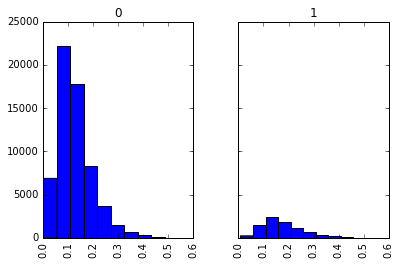

In [37]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame(data = {'probability':y_pred_prob, 'actual':y_test})
df.probability.hist(by=df.actual, sharex=True, sharey=True)

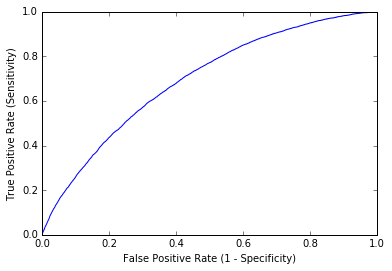

In [38]:
# plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

### Run with Both Fuzzy and Zip Transformers

In [20]:

features = [u'loan_amnt', 'term', 'int_rate', #'emp_length', 'emp_title', 
            u'home_ownership', u'annual_inc',u'verification_status', u'purpose', 
            #u'zip_code',u'addr_state', 
            u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', 
            u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc',#u'emp_title_flag',  
            u'fico_avg', #'fw_emp_title', 
            'emp_length_cat', u'fw_emp_title_gt0005', 
            u'zip_gt001'
           ]

target = ['loan_label']

X=df_reduce[features]
print X.columns
X = pd.get_dummies(X)
#col = X.columns
print X.shape
X = scale(X)
y=df_reduce[target].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=.3, random_state=random_state)
start = time()
grid_log.fit(X_train,y_train)
end = time()
print "{:.4f} seconds".format(end - start)
print grid_log.best_score_
print grid_log.best_estimator_
print grid_log.cv_results_
y_pred_prob = grid_log.predict_proba(X_test)[:,1]

print roc_auc_score(y_test, y_pred_prob)

Index([u'loan_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc', u'verification_status', u'purpose', u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'initial_list_status', u'collections_12_mths_ex_med', u'mort_acc', u'fico_avg', u'emp_length_cat', u'fw_emp_title_gt0005', u'zip_gt001'], dtype='object')
(232487, 333)
75.5427 seconds
0.685152021509
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=401, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'std_train_score': array([ 0.00062163,  0.00062175,  0.00062158,  0.00062286,  0.00064284,
        0.00073161,  0.00077874,  0.00078582]), 'rank_test_score': array([4, 3, 2, 1, 5, 6, 7, 8], dtype=int32), 'mean_score_time': array([ 0.1218853 ,  0.08141255,  0.02843936,  0.030598  ,  0.031907  ,
       

In [39]:
df_reduce.to_pickle('df_log_reg.p')